In [1]:
import time
import config
import tmdbsimple as tmdb          # tmdbsimple 2.2.0
tmdb.API_KEY = config.tmdb_api_key # get TMDB API key from config.py file

import pprint as pp
import pandas as pd
import numpy as np
import scipy as sp
import scipy.stats as stats
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline


In [2]:
print("Enter actor's full name...")
actor = input("... MUST be a string: ")
search = tmdb.Search()
actor_response = search.person(query=actor) 
actor_id = search.results[0]['id']
actor_id

Enter actor's full name...
... MUST be a string: Al Pacino


1158

In [3]:
actor_movie_credits = actor + " Movies"
actor_movie_credits

'Al Pacino Movies'

In [4]:
#Now get actor's credits
search_actor_id = tmdb.People(actor_id)
response_actor_id = search_actor_id.movie_credits()
response_actor_id
#actor_movie_credits = actor + " Credits")

{'cast': [{'character': 'Antonio "Tony" Montana',
   'credit_id': '52fe4219c3a36847f8003e47',
   'release_date': '1983-12-08',
   'vote_count': 5731,
   'video': False,
   'adult': False,
   'vote_average': 8.1,
   'title': 'Scarface',
   'genre_ids': [28, 80, 18, 53],
   'original_language': 'en',
   'original_title': 'Scarface',
   'popularity': 19.262,
   'id': 111,
   'backdrop_path': '/51fjuzYoJKvGW43j32nBpWW6Tm1.jpg',
   'overview': 'After getting a green card in exchange for assassinating a Cuban government official, Tony Montana stakes a claim on the drug trade in Miami. Viciously murdering anyone who stands in his way, Tony eventually becomes the biggest drug lord in the state, controlling nearly all the cocaine that comes through Miami. But increased pressure from the police, wars with Colombian drug cartels and his own drug-fueled paranoia serve to fuel the flames of his eventual downfall.',
   'poster_path': '/zr2p353wrd6j3wjLgDT4TcaestB.jpg'},
  {'character': 'Michael Corl

In [5]:
num_of_credits = len(response_actor_id['cast'][:])
num_of_credits   #how many movies

78

In [6]:
#Put all records in actor's first part of Data Frame (ie. hoffman_df)
labels = ['title','popularity','vote_average','vote_count']
idx = [film['id'] for film in response_actor_id['cast'][:]]
records = []
for film in (response_actor_id['cast'][:]):
    record = [film['title'], film['popularity'], film['vote_average'], film['vote_count']]
    records.append(record)

actor_df = pd.DataFrame.from_records(records, columns=labels, index=idx)
actor_df

,title,popularity,vote_average,vote_count
111,Scarface,19.262,8.1,5731
238,The Godfather,27.984,8.6,10549
240,The Godfather: Part II,22.620,8.5,6205
242,The Godfather: Part III,12.667,7.4,3075
298,Ocean's Thirteen,14.212,6.7,3653
320,Insomnia,12.762,6.9,2346
949,Heat,15.406,7.8,3382
968,Dog Day Afternoon,10.054,7.8,1329
1647,The Recruit,10.554,6.3,913
1813,The Devil's Advocate,12.983,7.4,2795


In [7]:
#Now get 2nd part of actor's df from the tmdb.Movies for merging
labels = ['revenue','budget','profit','genres']
film_indices = [film[0] for film in actor_df.iterrows()]
#print(film_indices)
records = []
request_rate_limit = 40     #TMDB has rate limit of 40 requests per 10 seconds

for film_idx in film_indices:
    request_rate_limit -= 1
    if request_rate_limit == 0:            
        print("Hold yer horses, cowboy!")
        print("...wait per request limit...")
        time.sleep(10)
        request_rate_limit = 39
    movie = tmdb.Movies(film_idx)  #Each movie has unique identifier stored as index of df
    response = movie.info()
        
    profit = response['revenue'] - response['budget']
    record = [response['revenue'], response['budget'], profit, response['genres']]    
    records.append(record)

actor_movies_df = pd.DataFrame.from_records(records, columns=labels, index=film_indices)
actor_movies_df    

Hold yer horses, cowboy!
...wait per request limit...


,revenue,budget,profit,genres
111,65884703,25000000,40884703,"[{'id': 28, 'name': 'Action'}, {'id': 80, 'nam..."
238,245066411,6000000,239066411,"[{'id': 18, 'name': 'Drama'}, {'id': 80, 'name..."
240,102600000,13000000,89600000,"[{'id': 18, 'name': 'Drama'}, {'id': 80, 'name..."
242,136766062,54000000,82766062,"[{'id': 80, 'name': 'Crime'}, {'id': 18, 'name..."
298,311312624,85000000,226312624,"[{'id': 80, 'name': 'Crime'}, {'id': 53, 'name..."
320,113714830,46000000,67714830,"[{'id': 80, 'name': 'Crime'}, {'id': 9648, 'na..."
949,187436818,60000000,127436818,"[{'id': 28, 'name': 'Action'}, {'id': 80, 'nam..."
968,46665856,1800000,44865856,"[{'id': 80, 'name': 'Crime'}, {'id': 18, 'name..."
1647,101191884,0,101191884,"[{'id': 28, 'name': 'Action'}, {'id': 53, 'nam..."
1813,152944660,57000000,95944660,"[{'id': 18, 'name': 'Drama'}, {'id': 9648, 'na..."


In [8]:
print(actor_df.shape)
actor_df.head(5)

(78, 4)


,title,popularity,vote_average,vote_count
111,Scarface,19.262,8.1,5731
238,The Godfather,27.984,8.6,10549
240,The Godfather: Part II,22.620,8.5,6205
242,The Godfather: Part III,12.667,7.4,3075
298,Ocean's Thirteen,14.212,6.7,3653


In [9]:
print(actor_movies_df.shape)
actor_movies_df.head(5)

(78, 4)


,revenue,budget,profit,genres
111,65884703,25000000,40884703,"[{'id': 28, 'name': 'Action'}, {'id': 80, 'nam..."
238,245066411,6000000,239066411,"[{'id': 18, 'name': 'Drama'}, {'id': 80, 'name..."
240,102600000,13000000,89600000,"[{'id': 18, 'name': 'Drama'}, {'id': 80, 'name..."
242,136766062,54000000,82766062,"[{'id': 80, 'name': 'Crime'}, {'id': 18, 'name..."
298,311312624,85000000,226312624,"[{'id': 80, 'name': 'Crime'}, {'id': 53, 'name..."


In [10]:
# This builds the full df, still need to build final
actor_full_df = pd.merge(actor_df, actor_movies_df, left_index=True, right_index=True)
print(actor_full_df.shape)
actor_full_df

(78, 8)


,title,popularity,vote_average,vote_count,revenue,budget,profit,genres
111,Scarface,19.262,8.1,5731,65884703,25000000,40884703,"[{'id': 28, 'name': 'Action'}, {'id': 80, 'nam..."
238,The Godfather,27.984,8.6,10549,245066411,6000000,239066411,"[{'id': 18, 'name': 'Drama'}, {'id': 80, 'name..."
240,The Godfather: Part II,22.620,8.5,6205,102600000,13000000,89600000,"[{'id': 18, 'name': 'Drama'}, {'id': 80, 'name..."
242,The Godfather: Part III,12.667,7.4,3075,136766062,54000000,82766062,"[{'id': 80, 'name': 'Crime'}, {'id': 18, 'name..."
298,Ocean's Thirteen,14.212,6.7,3653,311312624,85000000,226312624,"[{'id': 80, 'name': 'Crime'}, {'id': 53, 'name..."
320,Insomnia,12.762,6.9,2346,113714830,46000000,67714830,"[{'id': 80, 'name': 'Crime'}, {'id': 9648, 'na..."
949,Heat,15.406,7.8,3382,187436818,60000000,127436818,"[{'id': 28, 'name': 'Action'}, {'id': 80, 'nam..."
968,Dog Day Afternoon,10.054,7.8,1329,46665856,1800000,44865856,"[{'id': 80, 'name': 'Crime'}, {'id': 18, 'name..."
1647,The Recruit,10.554,6.3,913,101191884,0,101191884,"[{'id': 28, 'name': 'Action'}, {'id': 53, 'nam..."
1813,The Devil's Advocate,12.983,7.4,2795,152944660,57000000,95944660,"[{'id': 18, 'name': 'Drama'}, {'id': 9648, 'na..."


In [ ]:
#Save to PostgrSQL 

In [11]:
#Create new column containing a list of genres for each movie
def to_list(cell):
    #input is a single cell containing a list of dicts
    #rreturns a list of genres as unique strings
    l = []
    for d in cell:     #cell is list of dicts
        l.append(d['name'])
    return(l)

actor_full_df['genre_names'] = actor_full_df['genres'].map(to_list)
#Drop duplicate info
actor_full_df.drop(['genres'], axis=1, inplace=True)
actor_full_df

,title,popularity,vote_average,vote_count,revenue,budget,profit,genre_names
111,Scarface,19.262,8.1,5731,65884703,25000000,40884703,"[Action, Crime, Drama, Thriller]"
238,The Godfather,27.984,8.6,10549,245066411,6000000,239066411,"[Drama, Crime]"
240,The Godfather: Part II,22.620,8.5,6205,102600000,13000000,89600000,"[Drama, Crime]"
242,The Godfather: Part III,12.667,7.4,3075,136766062,54000000,82766062,"[Crime, Drama, Thriller]"
298,Ocean's Thirteen,14.212,6.7,3653,311312624,85000000,226312624,"[Crime, Thriller]"
320,Insomnia,12.762,6.9,2346,113714830,46000000,67714830,"[Crime, Mystery, Thriller]"
949,Heat,15.406,7.8,3382,187436818,60000000,127436818,"[Action, Crime, Drama, Thriller]"
968,Dog Day Afternoon,10.054,7.8,1329,46665856,1800000,44865856,"[Crime, Drama, Thriller]"
1647,The Recruit,10.554,6.3,913,101191884,0,101191884,"[Action, Thriller]"
1813,The Devil's Advocate,12.983,7.4,2795,152944660,57000000,95944660,"[Drama, Mystery, Thriller, Fantasy]"


In [12]:
print(actor_full_df.shape)
actor_full_df.describe()

(78, 8)


,popularity,vote_average,vote_count,revenue,budget,profit
count,78.000000,78.000000,78.000000,7.800000e+01,7.800000e+01,7.800000e+01
mean,7.365795,6.246154,733.115385,3.418343e+07,1.651263e+07,1.767081e+07
std,7.727698,1.981125,1640.480979,6.413473e+07,2.744633e+07,5.201831e+07
min,0.600000,0.000000,0.000000,0.000000e+00,0.000000e+00,-1.250000e+08
25%,2.424750,5.800000,15.500000,0.000000e+00,0.000000e+00,0.000000e+00
50%,6.236500,6.750000,102.500000,0.000000e+00,0.000000e+00,0.000000e+00
75%,9.636500,7.375000,573.750000,3.571201e+07,2.725000e+07,1.161967e+07
max,56.520000,10.000000,10549.000000,3.113126e+08,1.250000e+08,2.390664e+08


Delete rows with non-movies (eg. Documentary(99), TV Movie(10770) ). Deciding what constitutes a genre.
1. Eliminate rows containing Documentery or TV Movie as a genre.
2. Eliminate rows where revenue or budget are zero.

In [13]:
actor_full_df.head(3)

,title,popularity,vote_average,vote_count,revenue,budget,profit,genre_names
111,Scarface,19.262,8.1,5731,65884703,25000000,40884703,"[Action, Crime, Drama, Thriller]"
238,The Godfather,27.984,8.6,10549,245066411,6000000,239066411,"[Drama, Crime]"
240,The Godfather: Part II,22.620,8.5,6205,102600000,13000000,89600000,"[Drama, Crime]"


In [ ]:
# If Genres is in Documentary(99), TV Movie(10770), delete the row.
# If revenue, budget or profit is zero or NaN, eliminate the row.
# If vote_count	< 20, eliminate the row.
#hoffman_full_df.isnull().sum()


In [14]:
#Function removes Documentary(99) and TV Movie(10770) genres on each cell
def exclude_genres(cell):
    '''looks for excluded values in a cell
       returns boolean mask'''
    excluded_genre = ['TV Movie','Documentary']
#    print(cell)
    if len(cell) == 0:
        return False
    else:
        for g in excluded_genre:
            if g in cell:
                return False
    return True

#  .map to genres column
actor_full_df = actor_full_df[actor_full_df.genre_names.map(exclude_genres)]            
actor_full_df

,title,popularity,vote_average,vote_count,revenue,budget,profit,genre_names
111,Scarface,19.262,8.1,5731,65884703,25000000,40884703,"[Action, Crime, Drama, Thriller]"
238,The Godfather,27.984,8.6,10549,245066411,6000000,239066411,"[Drama, Crime]"
240,The Godfather: Part II,22.620,8.5,6205,102600000,13000000,89600000,"[Drama, Crime]"
242,The Godfather: Part III,12.667,7.4,3075,136766062,54000000,82766062,"[Crime, Drama, Thriller]"
298,Ocean's Thirteen,14.212,6.7,3653,311312624,85000000,226312624,"[Crime, Thriller]"
320,Insomnia,12.762,6.9,2346,113714830,46000000,67714830,"[Crime, Mystery, Thriller]"
949,Heat,15.406,7.8,3382,187436818,60000000,127436818,"[Action, Crime, Drama, Thriller]"
968,Dog Day Afternoon,10.054,7.8,1329,46665856,1800000,44865856,"[Crime, Drama, Thriller]"
1647,The Recruit,10.554,6.3,913,101191884,0,101191884,"[Action, Thriller]"
1813,The Devil's Advocate,12.983,7.4,2795,152944660,57000000,95944660,"[Drama, Mystery, Thriller, Fantasy]"


In [15]:
#Eliminate the rows without budget or revenue data
good_money_df = actor_full_df[(actor_full_df.budget > 0.0) & (actor_full_df.revenue > 0.0)]
pd.options.display.float_format = '{:,.2f}'.format
#good_money_df['revenue'] = good_money_df['revenue'].apply(lambda x: '{:d}'.format(x))

#good_money_df['budget'] = good_money_df['budget'].apply(lambda x: '{:,.2f}'.format(x))

#good_money_df['profit'] = good_money_df['profit'].apply(lambda x: '{:,.2f}'.format(x))
#print(good_money_df.info())
print(good_money_df.shape)
print(good_money_df.describe())
good_money_df

(28, 8)
       popularity  vote_average  vote_count        revenue        budget  \
count       28.00         28.00       28.00          28.00         28.00   
mean        13.04          6.84    1,878.07  89,671,619.82 39,082,142.86   
std          9.92          1.20    2,346.35  79,578,257.45 27,056,799.70   
min          5.51          3.60       40.00     143,101.00  1,800,000.00   
25%          8.42          6.07      403.00  28,043,383.75 17,500,000.00   
50%         10.14          7.15      902.50  69,529,634.50 33,000,000.00   
75%         13.12          7.60    2,458.25 134,762,955.25 55,500,000.00   
max         56.52          8.60   10,549.00 311,312,624.00 95,000,000.00   

              profit  
count          28.00  
mean   50,589,476.96  
std    70,073,491.61  
min   -46,733,791.00  
25%    -2,295,303.75  
50%    42,875,279.50  
75%    90,169,878.25  
max   239,066,411.00  


,title,popularity,vote_average,vote_count,revenue,budget,profit,genre_names
111,Scarface,19.26,8.10,5731,65884703,25000000,40884703,"[Action, Crime, Drama, Thriller]"
238,The Godfather,27.98,8.60,10549,245066411,6000000,239066411,"[Drama, Crime]"
240,The Godfather: Part II,22.62,8.50,6205,102600000,13000000,89600000,"[Drama, Crime]"
242,The Godfather: Part III,12.67,7.40,3075,136766062,54000000,82766062,"[Crime, Drama, Thriller]"
298,Ocean's Thirteen,14.21,6.70,3653,311312624,85000000,226312624,"[Crime, Thriller]"
320,Insomnia,12.76,6.90,2346,113714830,46000000,67714830,"[Crime, Mystery, Thriller]"
949,Heat,15.41,7.80,3382,187436818,60000000,127436818,"[Action, Crime, Drama, Thriller]"
968,Dog Day Afternoon,10.05,7.80,1329,46665856,1800000,44865856,"[Crime, Drama, Thriller]"
1813,The Devil's Advocate,12.98,7.40,2795,152944660,57000000,95944660,"[Drama, Mystery, Thriller, Fantasy]"
3489,88 Minutes,9.78,5.70,580,16930884,30000000,-13069116,"[Crime, Mystery, Thriller]"


In [16]:
print("Enter valid genre: ")
test_for_genre = input("... MUST be a capitalized: ")

def is_genre(cell):
    #returns True if in, else false (for masking)
    if test_for_genre in cell:
        return True 
    return False

tested_for_genre_df = good_money_df[good_money_df.genre_names.map(is_genre)]
not_tested_for_genre_df = good_money_df[False == good_money_df.genre_names.map(is_genre)]

print(tested_for_genre_df.shape)
print(tested_for_genre_df.describe())
tested_for_genre_df

Enter valid genre: 
... MUST be a capitalized: Crime
(18, 8)
       popularity  vote_average  vote_count        revenue        budget  \
count       18.00         18.00       18.00          18.00         18.00   
mean        15.52          7.23    2,477.17 104,010,763.28 36,516,666.67   
std         11.57          0.88    2,700.86  85,149,219.15 26,896,408.03   
min          7.88          5.70      263.00  10,725,228.00  1,800,000.00   
25%          9.19          6.70      596.50  37,875,758.25 14,500,000.00   
50%         12.46          7.50    1,433.50  87,887,283.00 32,500,000.00   
75%         15.11          7.80    3,305.25 131,003,254.00 52,250,000.00   
max         56.52          8.60   10,549.00 311,312,624.00 95,000,000.00   

              profit  
count          18.00  
mean   67,494,096.61  
std    73,356,624.58  
min   -13,069,116.00  
25%     8,509,889.25  
50%    50,802,291.00  
75%    91,309,634.75  
max   239,066,411.00  


,title,popularity,vote_average,vote_count,revenue,budget,profit,genre_names
111,Scarface,19.26,8.10,5731,65884703,25000000,40884703,"[Action, Crime, Drama, Thriller]"
238,The Godfather,27.98,8.60,10549,245066411,6000000,239066411,"[Drama, Crime]"
240,The Godfather: Part II,22.62,8.50,6205,102600000,13000000,89600000,"[Drama, Crime]"
242,The Godfather: Part III,12.67,7.40,3075,136766062,54000000,82766062,"[Crime, Drama, Thriller]"
298,Ocean's Thirteen,14.21,6.70,3653,311312624,85000000,226312624,"[Crime, Thriller]"
320,Insomnia,12.76,6.90,2346,113714830,46000000,67714830,"[Crime, Mystery, Thriller]"
949,Heat,15.41,7.80,3382,187436818,60000000,127436818,"[Action, Crime, Drama, Thriller]"
968,Dog Day Afternoon,10.05,7.80,1329,46665856,1800000,44865856,"[Crime, Drama, Thriller]"
3489,88 Minutes,9.78,5.70,580,16930884,30000000,-13069116,"[Crime, Mystery, Thriller]"
6075,Carlito's Way,12.25,7.80,1538,36516012,30000000,6516012,[Crime]


In [17]:
#Not in genre info
print(not_tested_for_genre_df.shape)
print(not_tested_for_genre_df.describe())
not_tested_for_genre_df.head(3)  

(10, 8)
       popularity  vote_average  vote_count        revenue        budget  \
count       10.00         10.00       10.00          10.00         10.00   
mean         8.56          6.13      799.70  63,861,161.60 43,700,000.00   
std          2.75          1.41      852.87  64,432,097.37 28,158,480.07   
min          5.51          3.60       40.00     143,101.00  4,000,000.00   
25%          6.19          5.50      210.50   8,158,594.75 28,250,000.00   
50%          7.90          6.70      565.00  41,531,723.50 42,500,000.00   
75%         10.50          7.25    1,102.50 125,629,147.75 56,500,000.00   
max         12.98          7.60    2,795.00 152,944,660.00 90,000,000.00   

              profit  
count          10.00  
mean   20,161,161.60  
std    54,462,040.88  
min   -46,733,791.00  
25%   -22,287,685.75  
50%    -1,510,573.50  
75%    64,313,049.00  
max   103,095,253.00  


,title,popularity,vote_average,vote_count,revenue,budget,profit,genre_names
1813,The Devil's Advocate,12.98,7.40,2795,152944660,57000000,95944660,"[Drama, Mystery, Thriller, Fantasy]"
3784,Frankie and Johnny,6.33,6.70,245,22773535,29000000,-6226465,"[Drama, Romance]"
8046,Gigli,6.14,3.60,199,7266209,54000000,-46733791,"[Drama, Comedy]"


In [18]:
len(tested_for_genre_df['popularity'])

18

[Text(0, 0, 'Crime'), Text(0, 0, 'Not Crime')]

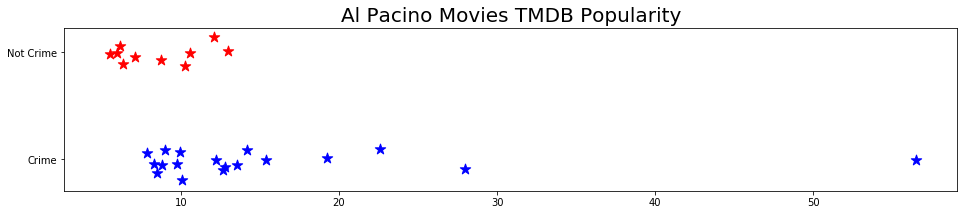

In [19]:
#Plot the distribution for popularity

fig, ax = plt.subplots(1, figsize=(16, 3))
ax.scatter(tested_for_genre_df['popularity'], np.repeat(0, len(tested_for_genre_df['popularity'])) + np.random.normal(0, 0.1, len(tested_for_genre_df['popularity'])), marker="*", c='blue', s=120)
ax.scatter(not_tested_for_genre_df['popularity'], np.repeat(1, len(not_tested_for_genre_df['popularity'])) + np.random.normal(0, 0.1, len(not_tested_for_genre_df['popularity'])),marker="*", c='red', s=120)
plt.title(actor + ' Movies TMDB Popularity', size = 20)
ax.set_yticks([0, 1])

ax.set_yticklabels([test_for_genre, "Not " + test_for_genre])  #generalize the label for and genre
#plt.tight_layout()

Null Hypothesis: H0 - There is no difference in the popularity of Pacino's crime genre movies vs. his non-crime genre movies categories.
This hypothesis will be tested with the Rank Sum Statistic aka the U-Test

In [22]:
def count_winning_pairs(sample_1, sample_2):
    sample_1, sample_2 = np.array(sample_1), np.array(sample_2)
    n_total_wins = 0
    for x in sample_1:
        n_wins = np.sum(x > sample_2) + 0.5*np.sum(x == sample_2)
        n_total_wins += n_wins
    return n_total_wins

not_genre_wins = count_winning_pairs(not_tested_for_genre_df['popularity'], tested_for_genre_df['popularity'])
genre_wins = count_winning_pairs(tested_for_genre_df['popularity'], not_tested_for_genre_df['popularity'])
print("Total Number of Comparisons: {}\n".format(len(not_tested_for_genre_df['profit'])*len(tested_for_genre_df['profit'])))

print("Number of In Genre: " + test_for_genre + " Movie Wins: {}".format(genre_wins))
print("Number of 'Not-in-Genre' Movie Wins: {}\n".format(not_genre_wins))

Total Number of Comparisons: 180

Number of 'Not-in-Genre' Movie Wins: 38.0

Number of In Genre: Crime Movie Wins: 142.0


The total number of wins is the total number of comparisons between a popularity of an "in genre" movie and the popularity of a not-in-genre movie.

In [21]:
# Now, using the U-Test (aka the Mann-Whitney U Statistic) calculate 
#    the Rank Sum Statistic
res = stats.mannwhitneyu(not_tested_for_genre_df['popularity'], tested_for_genre_df['popularity'], alternative="greater")
print("p-value for 'Not-in-Genre' Movie Popularity > " + test_for_genre + " Movie Popularity: {:2.3f}".format(res.pvalue))

p-value for 'Not-in-Genre' Movie Popularity > Crime Movie Popularity: 0.994


*********************************

Here, we do reject the null hypothesis that Al Pacino's crime movies are less popular than his non-crime movies, at least in the measure of popularity in the TMDB.

*****Note that this conclusion will change for each actor and each genre tested!!!!

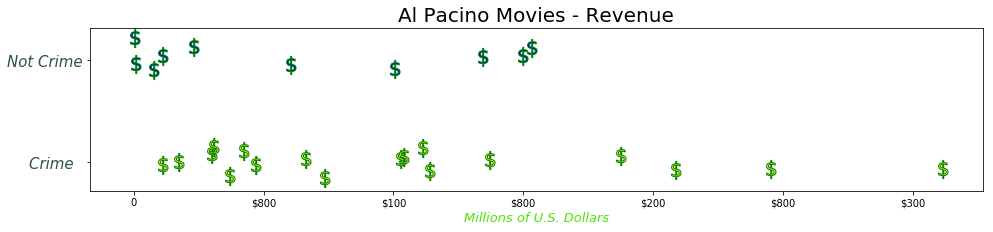

In [23]:
#Plot the distribution for profit
fig, ax = plt.subplots(1, figsize=(16, 3))
ax.scatter(tested_for_genre_df['revenue'], np.repeat(0, len(tested_for_genre_df['revenue'])) + np.random.normal(0, 0.1, len(tested_for_genre_df['revenue'])), marker='$''\$''$', c='yellow', edgecolors='green', s=330)
ax.scatter(not_tested_for_genre_df['revenue'], np.repeat(1, len(not_tested_for_genre_df['revenue'])) + np.random.normal(0, 0.1, len(not_tested_for_genre_df['revenue'])),marker='$''\$''$',c='blue', edgecolors='green', s=330)
plt.title(actor + ' Movies - Revenue', size=20)


def format_func(value, tick_number):
    # find number of multiples of pi/2
    N = int(np.round(value / 1000000))
    if N == 0:
        return "0"
    elif N == 100:
        return ("$100")
    elif N == 200:
        return ("$200")
    elif N == 300:
        return ("$300")
    elif N == 400:
        return ("$400")
    elif N == 500:
        return ("$500")
    elif N == 600:
        return ("$600")
    elif N == 700:
        return ("$700")
    else:
        return ("$800")

ax.xaxis.set_major_formatter(plt.FuncFormatter(format_func))
ax.set_xlabel('Millions of U.S. Dollars', backgroundcolor='white', color=(.3, .9, .01), animated=True, fontstyle='italic', size=13)
ax.set_yticks([0, 1])
_nothing = ax.set_yticklabels([test_for_genre + "  ", "Not " + test_for_genre], fontstyle='oblique', color=(.18, .31, .31), size='15')
#plt.tight_layout()

******
Null Hypothesis: H0 - There is no difference in the revenue of Al Pacino Crime genre movies and the revenue of those movies not in the Crime genre.
This hypothesis will be tested with the Rank Sum Statistic aka the U-Test
*******Note that this will change for each actor and genre tested.

In [24]:
def count_winning_pairs(sample_1, sample_2):
    sample_1, sample_2 = np.array(sample_1), np.array(sample_2)
    n_total_wins = 0
    for x in sample_1:
        n_wins = np.sum(x > sample_2) + 0.5*np.sum(x == sample_2)
        n_total_wins += n_wins
    return n_total_wins

not_genre_wins = count_winning_pairs(not_tested_for_genre_df['revenue'], tested_for_genre_df['revenue'])
genre_wins = count_winning_pairs(tested_for_genre_df['revenue'], not_tested_for_genre_df['revenue'])
print("Total Number of Comparisons: {}\n".format(len(not_tested_for_genre_df['revenue'])*len(tested_for_genre_df['revenue'])))
print("Number of 'Not-in-Genre' Movie Wins: {}\n".format(not_genre_wins))
print("Number of In Genre: " + test_for_genre + " Movie Wins: {}".format(genre_wins))

Total Number of Comparisons: 180

Number of 'Not-in-Genre' Movie Wins: 60.0

Number of In Genre: Crime Movie Wins: 120.0


Remember, the total number of "wins" is the total number of comparisons between the revenue of a in-genre movie and the revenue of a not-in-genre movie.

In [25]:
# Now, using the U-Test (aka the Mann-Whitney U Statistic) calculate 
#    the Rank Sum Statistic
res = stats.mannwhitneyu(not_tested_for_genre_df['revenue'], tested_for_genre_df['revenue'], alternative="greater")

print("p-value for 'Not-in-Genre' Movie Popularity > " + test_for_genre + " Movie Popularity: {:2.3f}".format(res.pvalue))

p-value for 'Not-in-Genre' Movie Popularity > Crime Movie Popularity: 0.928


******
Unfortunately, we cannot reject the null hypothesis that there is no difference in revenue between Al Pacino's and non-crime genre movies.
*****Note that this conclusion will change for each actor & genre tested.

In [26]:
# Now, using the U-Test (aka the Mann-Whitney U Statistic) calculate 
#    the Rank Sum Statistic
res = stats.mannwhitneyu(not_tested_for_genre_df['profit'], tested_for_genre_df['profit'], alternative="greater")

print("p-value for 'Not-in-Genre' Movie Popularity > " + test_for_genre + " Movie Popularity: {:2.3f}".format(res.pvalue))

p-value for 'Not-in-Genre' Movie Popularity > Crime Movie Popularity: 0.960


In [ ]:
******
However, we can reject the null hypothesis that there is a difference in profit between Al Pacino's 
and his non-crime genre movies. 
*****Note that this conclusion will change for each actor & genre tested.